In [3]:
import numpy as np
import matplotlib.pyplot as plt



def plot_potential_and_diffusion(potential_scalar_field, diffusion_matrix_field, title):
    # Generate a grid of points
    x = np.linspace(-4, 4, 20)
    y = np.linspace(-4, 4, 20)
    X, Y = np.meshgrid(x, y)

    # Calculate the eigenvalues and eigenvectors of the matrix field at each point
    U1 = np.zeros((len(x), len(y)))
    V1 = np.zeros((len(x), len(y)))
    U2 = np.zeros((len(x), len(y)))
    V2 = np.zeros((len(x), len(y)))
    for i in range(len(x)):
        for j in range(len(y)):
            eigenvalues, eigenvectors = np.linalg.eig(diffusion_matrix_field(x[i], y[j]))
            if eigenvalues[0] > eigenvalues[1]:
                U1[i, j] = eigenvectors[0, 0]
                V1[i, j] = eigenvectors[1, 0]
                U2[i, j] = eigenvectors[0, 1]
                V2[i, j] = eigenvectors[1, 1]
            else:
                U1[i, j] = eigenvectors[0, 1]
                V1[i, j] = eigenvectors[1, 1]
                U2[i, j] = eigenvectors[0, 0]
                V2[i, j] = eigenvectors[1, 0]

    # Plot the eigenvectors scaled by eigenvalues
    plt.contourf(X, Y, potential_scalar_field(X, Y), 20, cmap='viridis')
    plt.quiver(X, Y, U1 * eigenvalues[0], V1 * eigenvalues[0], scale=20, color='k', label='Eigenvalue 1')
    plt.quiver(X, Y, U2 * eigenvalues[1], V2 * eigenvalues[1], scale=20, color='r', label='Eigenvalue 2')

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(title)
    plt.legend()

    # Colour contour plot of the potential

    plt.show()



In [4]:
def isotropic_MoroCardin_matrix_field(x, y):
    return 1/(1.0 + 5.0 * np.exp(- (x**2 + y**2) / (2 * 0.3**2))) * np.array([[1, 0], [0, 1]])

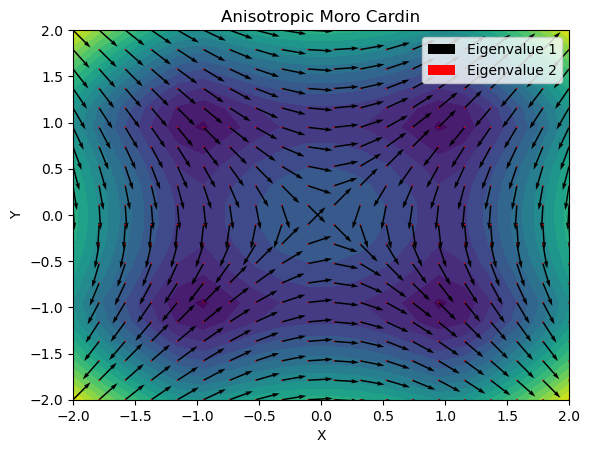

In [128]:
# Define the matrix field function
def anisotropic_MoroCardin_matrix_field(x, y):
    theta_x = np.arctan2(y, x)
    theta_y = np.arctan2(x, y)
    factor = 1.0 + 5.0 * np.exp(- (x**2 + y**2) / (2 * 0.3**2))
    inv_factor = 1.0 / factor
    matrix = np.array([[np.cos(theta_x)**2, np.cos(theta_x) * np.cos(theta_y)],
                       [np.cos(theta_x) * np.cos(theta_y), np.cos(theta_y)**2]])
    return inv_factor * matrix

def quadruple_well_potential(x, y):
    return np.sqrt(17/16 - 2*x**2 + x**4) + np.sqrt(17/16 - 2*y**2 + y**4)

plot_potential_and_diffusion(quadruple_well_potential, anisotropic_MoroCardin_matrix_field, "Anisotropic Moro Cardin")

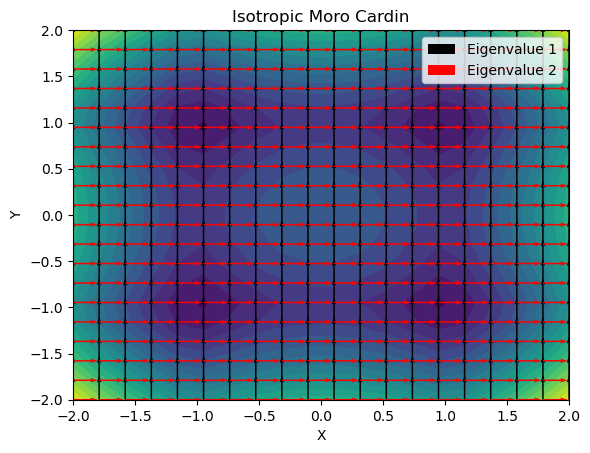

In [131]:
plot_potential_and_diffusion(quadruple_well_potential, isotropic_MoroCardin_matrix_field, "Isotropic Moro Cardin")

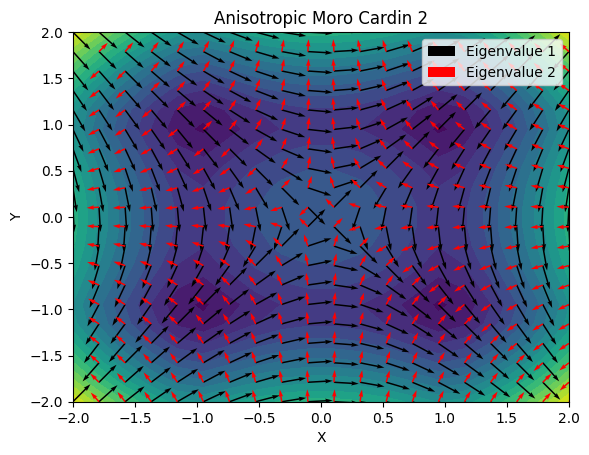

In [66]:
def anisotropic_MoroCardin_matrix_field2(x, y):
    theta = np.arctan2(y, x)
    factor = 1.0 + 5.0 * np.exp(- (x**2 + y**2) / (2 * 0.3**2))
    inf_factor = 1.0 / factor
    matrix = np.array([[1-np.sin(theta)**2 / 2, np.cos(theta) * np.sin(theta) / 2],
                       [np.cos(theta) * np.sin(theta)/2, 1 - np.cos(theta)**2 / 2]])
    return inf_factor * matrix

plot_potential_and_diffusion(quadruple_well_potential, anisotropic_MoroCardin_matrix_field2, "Anisotropic Moro Cardin 2")

In [64]:
def potential_energy(x, y):
    term1 = (5*y)**2  / ((5*x)**2 + 1)
    term2 = (1/6) * (np.sqrt(4 * (1-x**2 - y**2)**2 + 2*(x**2 - 2)**2 + ((x+y)**2 -1)**2 +((x-y)**2 -1)**2) -2)
    return term1 + term2

def second_partial_y_derivative(x, y):
    result = 10 / (1 + 25 * x**2) + (np.sqrt(2) * (20 * x**6 + 2 * x**4 * (-31 + 18 * y**2) + 5 * x**2 * (13 - 18 * y**2 + 9 * y**4) + 3 * (-7 + 21 * y**2 - 9 * y**4 + 3 * y**6))) / (3 * (7 + 4 * x**4 - 6 * y**2 + 3 * y**4 + 10 * x**2 * (-1 + y**2))**(3/2))
    return result

def second_partial_x_derivative(x, y):
    term1 = (250 * (-1 + 75 * x**2) * y**2) / (1 + 25 * x**2)**3
    term2 = (np.sqrt(2) * (16 * x**6 + 60 * x**4 * (-1 + y**2) + 12 * x**2 * (7 - 6 * y**2 + 3 * y**4) + 5 * (-7 + 13 * y**2 - 9 * y**4 + 3 * y**6))) / (3 * (7 + 4 * x**4 - 6 * y**2 + 3 * y**4 + 10 * x**2 * (-1 + y**2))**(3/2))
    
    result = term1 + term2
    return result

def first_partial_y_derivative(x, y):
    term1 = (10 * y) / (1 + 25 * x**2)
    term2 = (np.sqrt(2) * y * (-3 + 5 * x**2 + 3 * y**2)) / (3 * np.sqrt(7 + 4 * x**4 - 6 * y**2 + 3 * y**4 + 10 * x**2 * (-1 + y**2)))
    
    result = term1 + term2
    return result

def first_partial_x_derivative(x, y):
    term1 = -(250 * x * y**2) / (1 + 25 * x**2)**2
    term2 = (np.sqrt(2) * x * (-5 + 4 * x**2 + 5 * y**2)) / (3 * np.sqrt(7 + 4 * x**4 - 6 * y**2 + 3 * y**4 + 10 * x**2 * (-1 + y**2)))
    
    result = term1 + term2
    return result

def plot_potential_and_diffusion2(potential_scalar_field, diffusion_matrix_field):
    # Generate coordinates for plotting
    x = np.linspace(-4, 4, 100)
    y = np.linspace(-4, 4, 100)
    X, Y = np.meshgrid(x, y)

    # Calculate potential energy values
    Z = potential_scalar_field(X, Y)

    # Define discrete levels for contour plot
    levels = np.linspace(-1, 4, 12)

    # Plotting the contour plot with reversed colors on a blue-red scale
    cmap = plt.cm.RdBu_r
    norm = plt.Normalize(vmin=-1, vmax=4)
    cmap.set_over(color='white')  

    plt.contourf(X, Y, Z, levels=levels, cmap=cmap, norm=norm, extend='both')
    plt.colorbar(label='Potential Energy')
    plt.title('Potential Energy Landscape')
    plt.xlabel('X')
    plt.ylabel('Y')

    # Subsample the grid for plotting the eigenvectors
    x = np.linspace(-5, 4, 10)
    y = np.linspace(-5, 4, 10)
    X, Y = np.meshgrid(x, y)

    # Calculate the eigenvalues and eigenvectors of the matrix field at each point
    dx = np.zeros((len(x), len(y)))
    dy = np.zeros((len(x), len(y)))
    for i in range(len(x)):
        for j in range(len(y)):
            dx[i, j] = np.sqrt((diffusion_matrix_field(x[i], y[j])[0, 0])**2 + (diffusion_matrix_field(x[i], y[j])[0, 1])**2)
            dy[i, j] = np.sqrt((diffusion_matrix_field(x[i], y[j])[1, 0])**2 + (diffusion_matrix_field(x[i], y[j])[1, 1])**2)

    # Plot the eigenvectors scaled by eigenvalues
    plt.quiver(Y, X, dx, 0, scale=15, color='b', label='Eigenvalue 1')
    plt.quiver(Y, X, 0, dy, scale=15, color='r', label='Eigenvalue 2')
    plt.quiver(Y, X, - dx, 0, scale=15, color='b')
    plt.quiver(Y, X, 0, -dy, scale=15, color='r')

    plt.show()

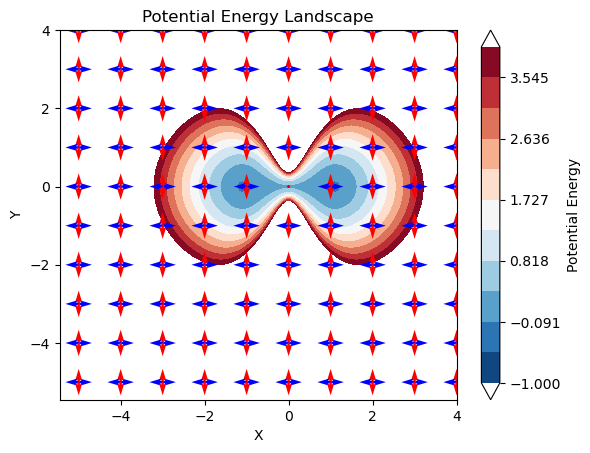

In [215]:
plot_potential_and_diffusion2(potential_energy, isotropic_MoroCardin_matrix_field)

In [68]:
def anisotropic_diffusion_field(x, y):
    matrix = np.array([[max(2 - potential_energy(x, y), 1)/(1+min(np.abs(second_partial_x_derivative(x,y)), 5)), 0],
                       [0, max(2 - potential_energy(x, y), 1)/(1+min(np.abs(second_partial_y_derivative(x,y)), 5))]])
    return matrix


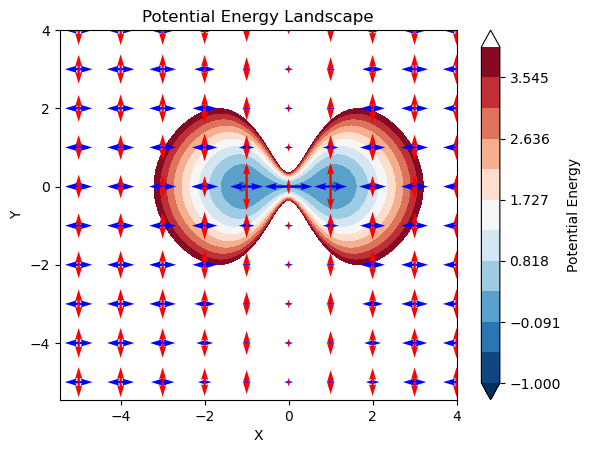

In [69]:
plot_potential_and_diffusion2(potential_energy, anisotropic_diffusion_field)

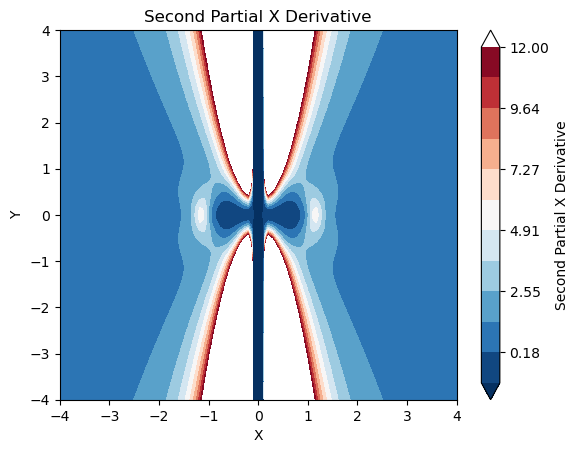

In [44]:
# plot a heat map of the second partial x derivative
x = np.linspace(-4, 4, 100)
y = np.linspace(-4, 4, 100)
X, Y = np.meshgrid(x, y)

Z = second_partial_x_derivative(X, Y)

# Define discrete levels for contour plot
levels = np.linspace(-1, 12, 12)

# Plotting the contour plot with reversed colors on a blue-red scale
cmap = plt.cm.RdBu_r
norm = plt.Normalize(vmin=-1, vmax=12)
cmap.set_over(color='white')

plt.contourf(X, Y, Z, levels=levels, cmap=cmap, norm=norm, extend='both')
plt.colorbar(label='Second Partial X Derivative')
plt.title('Second Partial X Derivative')
plt.xlabel('X')
plt.ylabel('Y')

plt.show()

In [46]:
second_partial_x_derivative(-1, 0)

2.3570226039551585

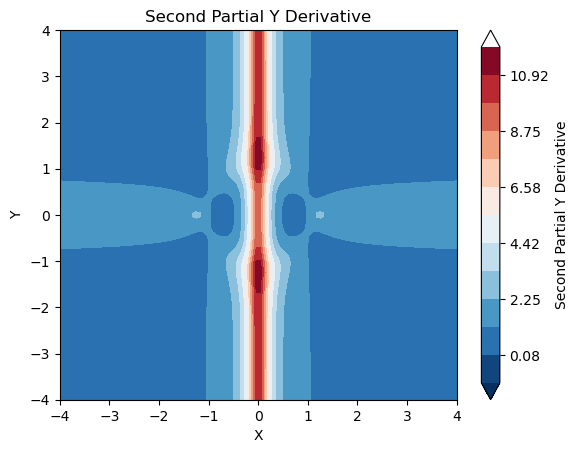

In [41]:
# plot a heat map of the second partial x derivative
x = np.linspace(-4, 4, 100)
y = np.linspace(-4, 4, 100)
X, Y = np.meshgrid(x, y)

Z = second_partial_y_derivative(X, Y)

# Define discrete levels for contour plot
levels = np.linspace(-1, 12, 13)

# Plotting the contour plot with reversed colors on a blue-red scale
cmap = plt.cm.RdBu_r
norm = plt.Normalize(vmin=-1, vmax=12)
cmap.set_over(color='white')

plt.contourf(X, Y, Z, levels=levels, cmap=cmap, norm=norm, extend='both')
plt.colorbar(label='Second Partial Y Derivative')
plt.title('Second Partial Y Derivative')
plt.xlabel('X')
plt.ylabel('Y')

plt.show()

In [47]:
second_partial_y_derivative(-1, 0)

1.3274244261974482